In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [41]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [42]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [43]:
# Construct a linear model
pred = tf.add(tf.mul(X, W), b)

In [44]:
# Mean square error
cost=tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)
# Gradient descent
optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [45]:
#initializing the variables
init = tf.initialize_all_variables()

Epoch: 0050 cost= 0.094379105 W= 0.323468 b= 0.270023 



Epoch: 0100 cost= 0.092366107 W= 0.319074 b= 0.30163 



Epoch: 0150 cost= 0.090585791 W= 0.314942 b= 0.331358 



Epoch: 0200 cost= 0.089011312 W= 0.311055 b= 0.359317 



Epoch: 0250 cost= 0.087618858 W= 0.3074 b= 0.385614 



Epoch: 0300 cost= 0.086387418 W= 0.303961 b= 0.410347 



Epoch: 0350 cost= 0.085298382 W= 0.300728 b= 0.433609 



Epoch: 0400 cost= 0.084335320 W= 0.297687 b= 0.455487 



Epoch: 0450 cost= 0.083483636 W= 0.294826 b= 0.476064 



Epoch: 0500 cost= 0.082730517 W= 0.292136 b= 0.495417 



Epoch: 0550 cost= 0.082064524 W= 0.289606 b= 0.513619 



Epoch: 0600 cost= 0.081475616 W= 0.287226 b= 0.530739 



Epoch: 0650 cost= 0.080954865 W= 0.284988 b= 0.546841 



Epoch: 0700 cost= 0.080494367 W= 0.282883 b= 0.561985 



Epoch: 0750 cost= 0.080087230 W= 0.280903 b= 0.576229 



Epoch: 0800 cost= 0.079727232 W= 0.279041 b= 0.589625 



Epoch: 0850 cost= 0.079408906 W= 0.277289 b= 0.602227 



Epoch: 0900 cost= 0.079127461 W= 0.275642 b= 0.614078 



Epoch: 0950 cost= 0.078878738 W= 0.274093 b= 0.625221 



Epoch: 1000 cost= 0.078658804 W= 0.272636 b= 0.635702 



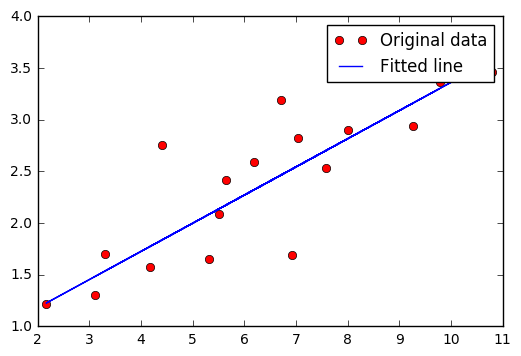

In [47]:
#Launch the graph
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        #display logs per epoch  step
        if ((epoch + 1) % display_step == 0):
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print "Epoch:", "%04d" % (epoch + 1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b), '\n'
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()